In [1]:
import sys
!{sys.executable} -m pip install opencv-python

     |████████████████████████████████| 28.3MB 8.5kB/s eta 0:00:01    |███                             | 2.6MB 1.8MB/s eta 0:00:15��████████████████  | 26.5MB 1.8MB/s eta 0:00:02 1.8MB/s eta 0:00:01


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "./data/train"
    
CATEGORIES = ["alai_darwaza","alai_minar","beach","Taj Mahal","jamali_kamali_tomb","qutub_minar","church"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='rgb')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

<Figure size 640x480 with 1 Axes>

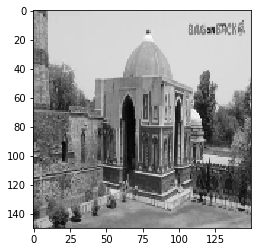

In [3]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 66/66 [00:16<00:00,  3.34it/s]

1036


In [5]:
import random

random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])

5
5
5
4
4
5
5
1
3
1


In [7]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[253]
   [252]
   [225]
   ...
   [ 86]
   [ 87]
   [ 88]]

  [[255]
   [255]
   [227]
   ...
   [ 87]
   [ 87]
   [ 88]]

  [[254]
   [254]
   [225]
   ...
   [ 87]
   [ 88]
   [ 89]]

  ...

  [[ 38]
   [ 34]
   [ 24]
   ...
   [ 59]
   [ 16]
   [ 31]]

  [[ 19]
   [ 36]
   [ 24]
   ...
   [156]
   [ 31]
   [ 26]]

  [[ 13]
   [ 43]
   [ 32]
   ...
   [118]
   [ 29]
   [ 44]]]]


In [8]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [9]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 725 samples, validate on 311 samples
Epoch 1/3
725/725 [==============================] - 750s 1s/sample - loss: -33.9527 - accuracy: 0.1793 - val_loss: -35.3503 - val_accuracy: 0.2219
Epoch 2/3
725/725 [==============================] - 774s 1s/sample - loss: -36.0172 - accuracy: 0.1807 - val_loss: -35.3503 - val_accuracy: 0.2219
Epoch 3/3
448/725 [=================>............] - ETA: 4:26 - loss: -35.5266 - accuracy: 0.1808

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
NAME = "Monument"

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [ ]:
model.fit(X, y,
          batch_size=32,
          epochs=3,
          validation_split=0.3,
          callbacks=[tensorboard])